In [1]:
%matplotlib inline

import os
import sys
import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sys.version_info

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)

In [3]:
data_dir = '../data/denoised'

In [4]:
file_names = glob.glob(os.path.join(data_dir, 'denoise*A*sig2.npz'))
file_names.extend(glob.glob(os.path.join(data_dir, 'denoise*A*relu2.npz')))
file_names.extend(glob.glob(os.path.join(data_dir, 'denoise*A*sigx.npz')))
file_names.extend(glob.glob(os.path.join(data_dir, 'denoise*A*relux.npz')))
file_names.extend(glob.glob(os.path.join(data_dir, 'compose*.npz')))

file_names.sort()
file_names

['../data/denoised/compose.npz',
 '../data/denoised/denoise_A_relu2.npz',
 '../data/denoised/denoise_A_relux.npz',
 '../data/denoised/denoise_A_sig2.npz',
 '../data/denoised/denoise_A_sigx.npz']

In [5]:
sections = []
for f_name in file_names:
    print(f_name)
    sections.append(np.load(f_name))

../data/denoised/compose.npz
../data/denoised/denoise_A_relu2.npz
../data/denoised/denoise_A_relux.npz
../data/denoised/denoise_A_sig2.npz
../data/denoised/denoise_A_sigx.npz


In [6]:
coords = np.load(os.path.join(data_dir, 'coords.npy'))

In [7]:
len(sections[0]['arr_0']), len(coords)

(256, 256)

In [8]:
data = np.concatenate((sections[0]['arr_0'], sections[0]['arr_1']))

In [11]:
type(data), data.shape

(numpy.ndarray, (512, 256, 256))

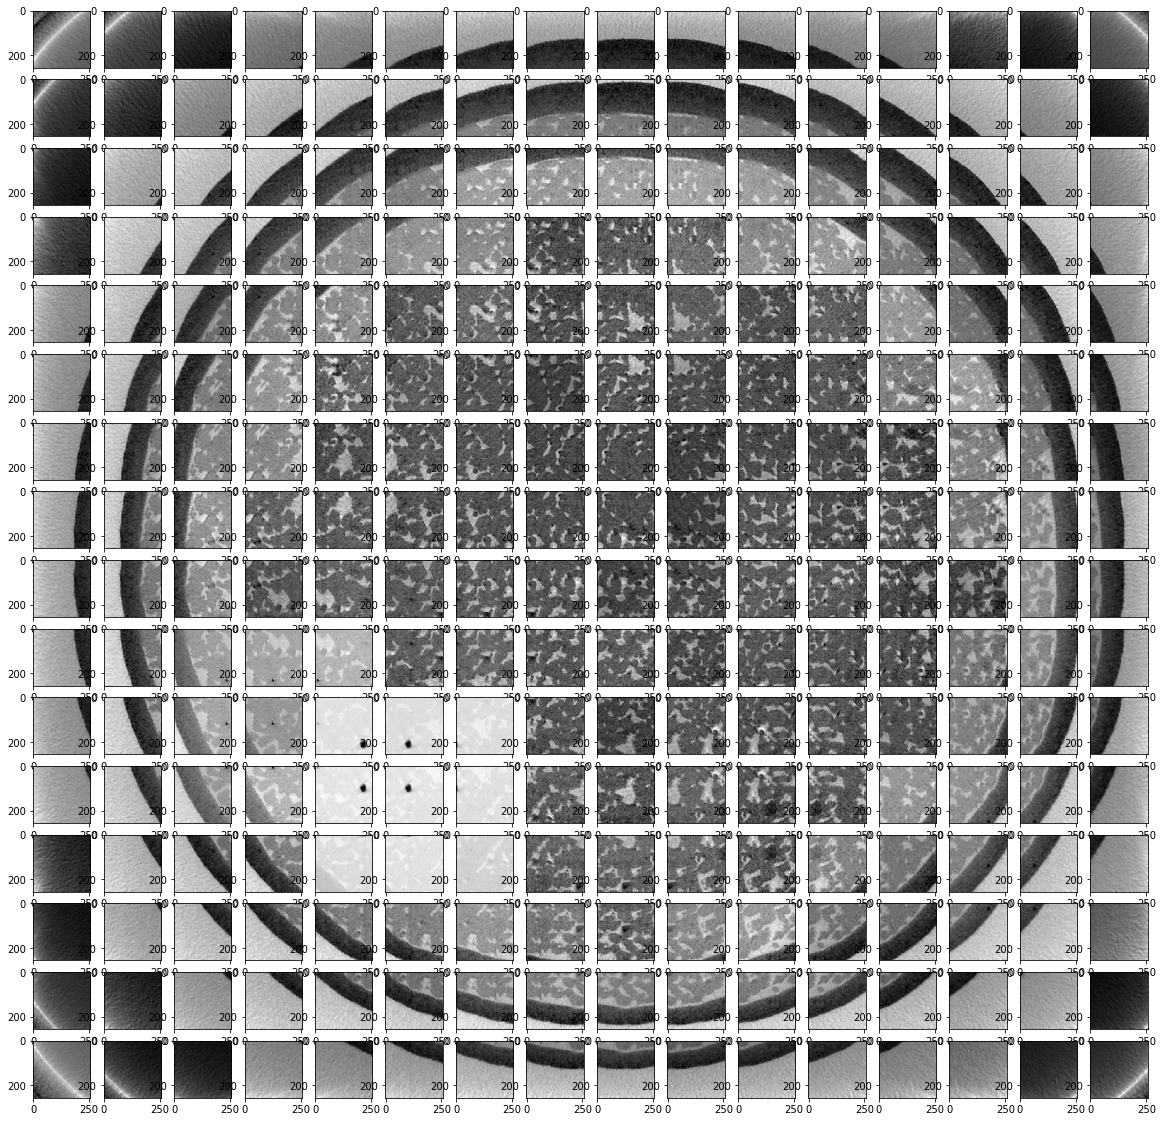

In [12]:
fig, axs = plt.subplots(nrows=16, ncols=16, figsize=(20,20))
axs = axs.flatten()
imags = []
for i in range(512):
    ix = i//2
    img = 0.5*(data[2*ix,:,:] + data[2*ix+1,:,:])
    if i % 2 == 0:
        imags.append(img)
    axs[ix].imshow(img, cmap='binary')

In [13]:
# stitch images together

def stitch(data, coords):
    
    width = np.max(coords[:,0]) + 256
    height = np.max(coords[:,1]) + 256
    print(width, height)
    image = np.zeros((width, height), dtype=float)
    cnts = np.zeros((width, height), dtype=float)

    
    for img, (x, y) in zip(data, coords):
        #print('xy', x, y, type(img), img.shape)
        image[x:x+256, y:y+256] += img
        cnts[x:x+256, y:y+256] += 1.0

    image /= cnts
    
    return image

In [15]:
image = stitch(imags, coords)

1906 1906


In [16]:
np.max(image), np.min(image), np.argmax(image), np.argmin(image)

(0.5868686884641647, 0.4091315269470215, 2508942, 242061)

In [17]:
np.unravel_index([2508942, 242061], image.shape)

(array([1316,  126]), array([ 646, 1905]))

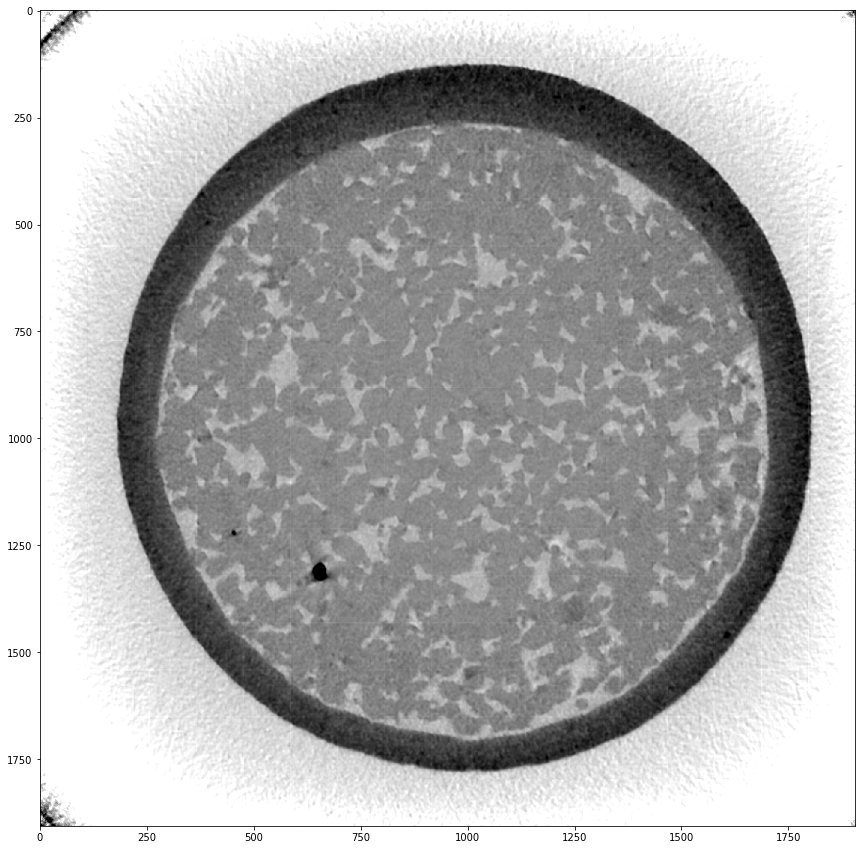

In [18]:
plt.figure(figsize=(15,15))
plt.imshow(np.clip(image, 0.49, 0.52), cmap='binary')

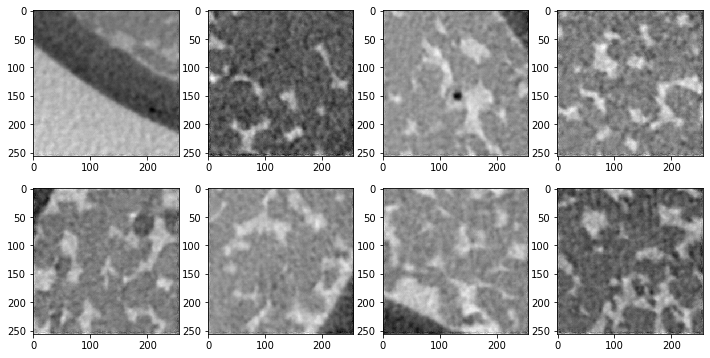

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs = axs.flatten()
for i in range(16):
    ix = i//2
    img = 0.5*(sections[1]['arr_1'][2*ix,:,:] +  sections[1]['arr_1'][2*ix+1,:,:])
    axs[ix].imshow(img, cmap='binary')

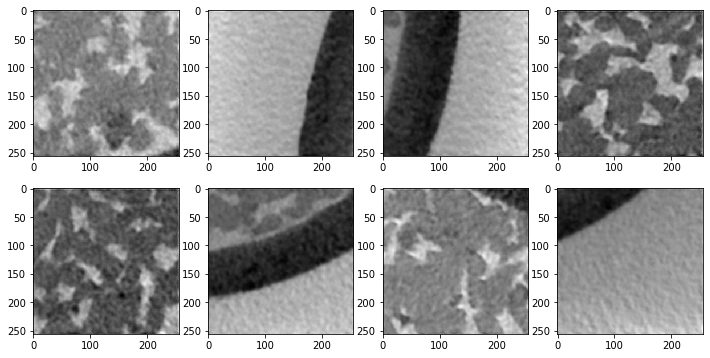

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs = axs.flatten()
for i in range(16):
    ix = i//2
    img = 0.5*(sections[2]['arr_1'][2*ix,:,:] +  sections[2]['arr_1'][2*ix+1,:,:])
    axs[ix].imshow(img, cmap='binary')

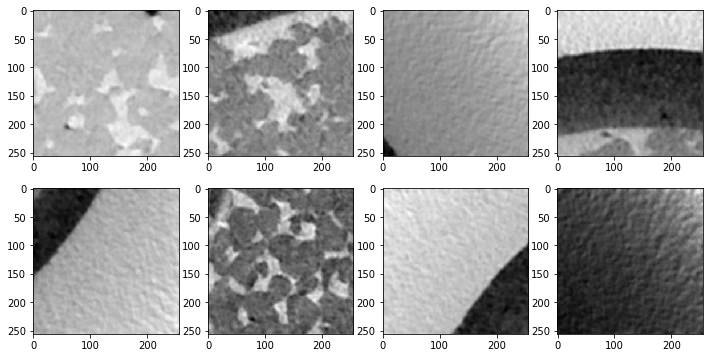

In [21]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,6))
axs = axs.flatten()
for i in range(16):
    ix = i//2
    img = 0.5*(sections[3]['arr_1'][2*ix,:,:] +  sections[3]['arr_1'][2*ix+1,:,:])
    axs[ix].imshow(img, cmap='binary')

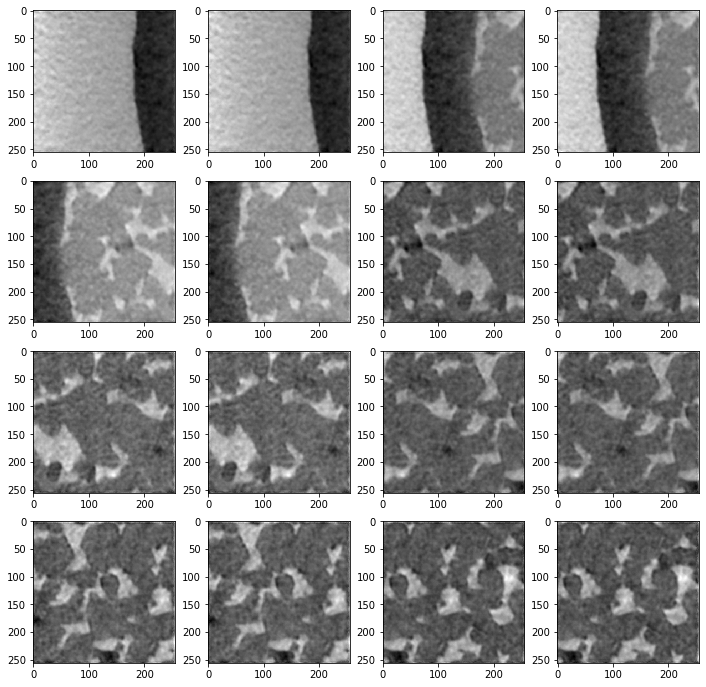

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12,12))
axs = axs.flatten()
for i in range(16):
    axs[i].imshow(sections[0]['arr_1'][i,:,:], cmap='binary')

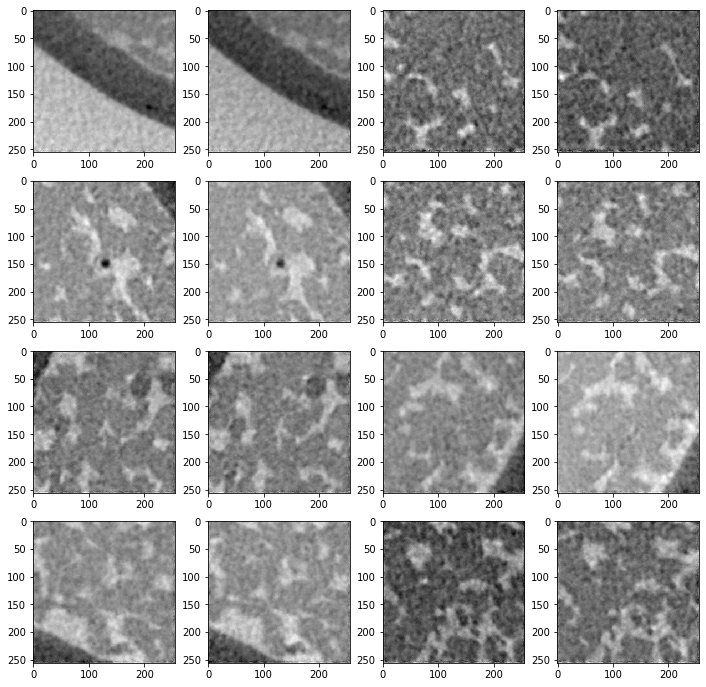

In [23]:
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(12,12))
axs = axs.flatten()
for i in range(16):
    axs[i].imshow(sections[1]['arr_1'][i,:,:], cmap='binary')

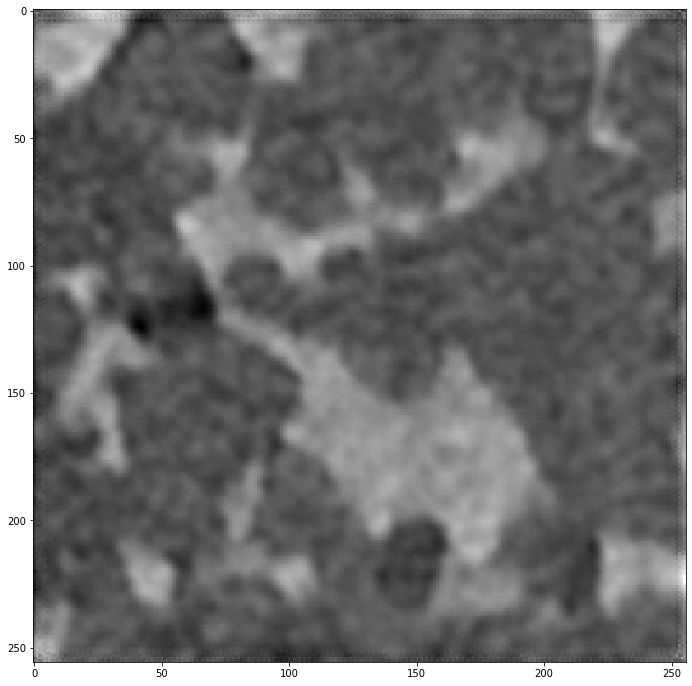

In [24]:
plt.figure(figsize=(12,12))
plt.imshow(sections[0]['arr_1'][6,:,:], cmap='binary')

In [25]:
denoise = 0.5*(sections[2]['arr_1'][0,:,:] - sections[3]['arr_1'][0,:,:])

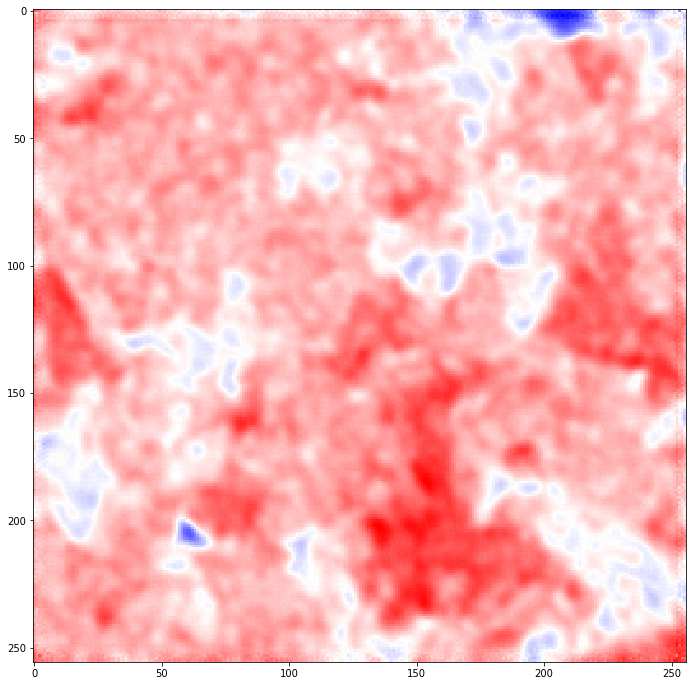

In [26]:
plt.figure(figsize=(12,12))
plt.imshow(denoise, cmap='bwr')